<a href="https://colab.research.google.com/github/salonigupta1/TransferLearning/blob/main/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
                hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape=IMAGE_SHAPE+(3,))
])

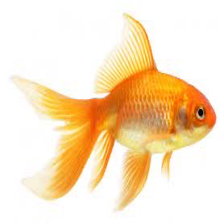

In [9]:
gold_fish = Image.open('goldfish.jpeg').resize(IMAGE_SHAPE)
gold_fish

In [11]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [12]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [15]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [16]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [17]:
image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [18]:
image_labels[predicted_label_index]

'goldfish'

In [19]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir

228827136/228813984 [==============================] - 3s 0us/step


'./datasets/flower_photos'

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [21]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/15054864058_2edca122a9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9240129413_f240ce7866_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7791014076_07a897cb85_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2721638730_34a9b7a78b.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14741812319_e1d32ffb84_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4625255191_26e17a28c9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8481979626_98c9f88848_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5896354497_6a19162741.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15839183375_49bf4f75e8_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5966729883_67f4fede93.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933230247_a0432f01da.jpg'),
 Posix

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [23]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4694341873_65fe187a4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15061894841_e5aca59ecd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/22093190909_77223e6f53_n.jpg')]

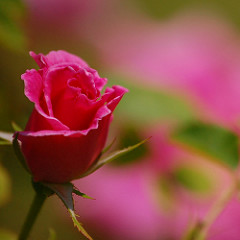

In [24]:
Image.open(str(roses[1]))

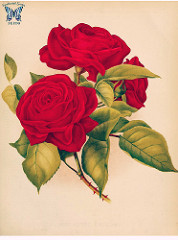

In [27]:
Image.open(str(roses[2]))

In [28]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [30]:
flower_lable_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips': 4
}

In [31]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(226, 320, 3)

In [33]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [39]:
X, y =[], []
for flower_name, images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flower_lable_dict[flower_name])

In [40]:
X[0]/255

array([[[0.01568627, 0.02745098, 0.04313725],
        [0.01960784, 0.03137255, 0.04705882],
        [0.01960784, 0.03137255, 0.04705882],
        ...,
        [0.0627451 , 0.10588235, 0.09411765],
        [0.08235294, 0.10588235, 0.10196078],
        [0.0745098 , 0.10196078, 0.10196078]],

       [[0.01960784, 0.03137255, 0.04705882],
        [0.01960784, 0.03137255, 0.04705882],
        [0.01960784, 0.03137255, 0.04705882],
        ...,
        [0.07058824, 0.11764706, 0.10588235],
        [0.08235294, 0.10588235, 0.10196078],
        [0.06666667, 0.09411765, 0.09411765]],

       [[0.01568627, 0.02745098, 0.04313725],
        [0.01960784, 0.03137255, 0.04705882],
        [0.01960784, 0.03137255, 0.04705882],
        ...,
        [0.07058824, 0.11764706, 0.10588235],
        [0.08235294, 0.10588235, 0.10196078],
        [0.07843137, 0.10980392, 0.10980392]],

       ...,

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0

In [41]:
X = np.array(X)
y = np.array(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [43]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [44]:
X_train_scaled[0]

array([[[0.36470588, 0.50588235, 0.38823529],
        [0.36862745, 0.49803922, 0.38823529],
        [0.35294118, 0.49803922, 0.37647059],
        ...,
        [0.10980392, 0.15294118, 0.10196078],
        [0.08235294, 0.1254902 , 0.08235294],
        [0.0627451 , 0.11764706, 0.0745098 ]],

       [[0.37254902, 0.50588235, 0.38823529],
        [0.36078431, 0.49803922, 0.38039216],
        [0.34901961, 0.49411765, 0.37254902],
        ...,
        [0.11372549, 0.16862745, 0.10980392],
        [0.08235294, 0.14117647, 0.08627451],
        [0.05490196, 0.13333333, 0.07058824]],

       [[0.36470588, 0.51372549, 0.38431373],
        [0.35294118, 0.49411765, 0.37254902],
        [0.34117647, 0.49019608, 0.36470588],
        ...,
        [0.1254902 , 0.18823529, 0.11764706],
        [0.09019608, 0.16470588, 0.09019608],
        [0.05490196, 0.14901961, 0.0745098 ]],

       ...,

       [[0.10980392, 0.45490196, 0.28235294],
        [0.10980392, 0.45490196, 0.28235294],
        [0.12156863, 0

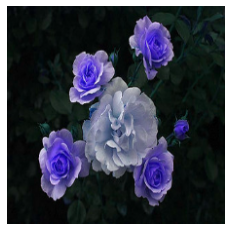

In [45]:
plt.axis('off')
plt.imshow(X[0])

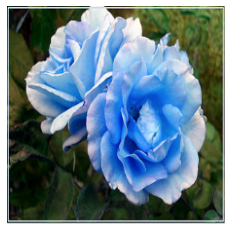

In [48]:
plt.axis('off')
plt.imshow(X[7])

In [51]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 722])

In [52]:
image_labels[795]

'shower curtain'

In [54]:
feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [55]:
num_of_flowers = 5
model = tf.keras.Sequential([
          pretrained_model_without_top_layer,
          tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [57]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)


model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
70/70 [==============================] - 11s 89ms/step - loss: 0.7631 - acc: 0.6939
Epoch 2/5
70/70 [==============================] - 6s 84ms/step - loss: 0.3437 - acc: 0.8698
Epoch 3/5
70/70 [==============================] - 6s 83ms/step - loss: 0.2688 - acc: 0.9093
Epoch 4/5
70/70 [==============================] - 6s 87ms/step - loss: 0.2268 - acc: 0.9273
Epoch 5/5
70/70 [==============================] - 6s 84ms/step - loss: 0.1970 - acc: 0.9439
